# FOI requests data analysis

As of April 10, 2022, PST

In this notebook, we use the CSV file generated by the auto-scraper to make our analysis of FOI requests.

Remember that the **foi-ph-scraper** ideally scrapes new information from the website every Sunday of the week. The file generated is in a separate repository, which I will just read in here.

In [1]:
import pandas as pd
import re
import requests
from plotnine import *
pd.set_option("display.max_columns", None)

/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Read df and clean it

Read through the CSV, remove unnecessary columns, look for NaN values and duplicates, convert to datetime before you go through the data.

In [2]:
df = pd.read_csv('foi_final.csv')
df.tail(10)

/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.


,Unnamed: 0,agency,date,title,status,purpose,period_covered,link,reason_denial
111525,5678,BIR,2022-04-10,TIN,PENDING,PRE EMPLOYMENT,11/23/2021 - 12/27/2021,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
111526,5679,DOLE,2022-04-10,FOLLOW UP DOLE AKAP CASH ASSISTANCE,PENDING,TO GET TO KNOW MY APPLICATION,07/21/2021 - 04/10/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
111527,5680,NTC,2022-04-10,Location of my Stolen Phone,PENDING,Track and locate,06/15/2021 - 04/07/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
111528,5681,DTI,2022-04-10,Average financial ratios in the food and bever...,PENDING,MBA research,04/10/2017 - 04/10/2021,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
111529,5682,PSA,2022-04-10,PHIL ID Card,PENDING,Status Update and Change delivery address of m...,06/30/2021 - 04/10/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
111530,5683,DOH,2022-04-10,Vaccination Card,PENDING,General,11/05/2021 - 01/26/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
111531,5684,DOH,2022-04-10,Vaxcert,PENDING,For travel requirements,12/27/2021 - 04/10/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
111532,5685,BIR,2022-04-10,ITR 1701,PENDING,"FOR BASIS OF FILING ITR THIS COMING APRIL 15, ...",04/15/2020 - 04/14/2021,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
111533,5673,NICA,2022-04-10,Email of NICA Cebu city,PENDING,For academic research,03/01/2021 - 04/10/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
111534,5698,BFAR,2022-04-10,"Coastal, marine, mangroves (fisheries), terres...",ACCEPTED,Undergraduate Thesis,01/01/2000 - 04/10/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN


## Drop 'Unnamed' column

In [3]:
df=df.drop('Unnamed: 0', axis=1)
df

,agency,date,title,status,purpose,period_covered,link,reason_denial
0,DICT,2016-11-25,Projects to be implemented by the DICT for the...,ACCEPTED,Research,11/25/2016 - 11/25/2016,NaN,—
1,DOTr,2016-11-25,Projects of DOT for region 7,SUCCESSFUL,for publication,01/01/2010 - 11/25/2016,NaN,—
2,DICT,2016-11-25,telcos company,DENIED,concern citizen,11/25/2016 - 11/25/2016,NaN,—
3,DOTr,2016-11-25,clark green city update,CLOSED,for update,11/25/2016 - 11/25/2016,NaN,—
4,DOTr,2016-11-25,List of Public Utility Bus companies and numbe...,SUCCESSFUL,Research for alternative solution in EDSA Traf...,01/01/2010 - 11/24/2016,NaN,—
...,...,...,...,...,...,...,...,...
111530,DOH,2022-04-10,Vaccination Card,PENDING,General,11/05/2021 - 01/26/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
111531,DOH,2022-04-10,Vaxcert,PENDING,For travel requirements,12/27/2021 - 04/10/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
111532,BIR,2022-04-10,ITR 1701,PENDING,"FOR BASIS OF FILING ITR THIS COMING APRIL 15, ...",04/15/2020 - 04/14/2021,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
111533,NICA,2022-04-10,Email of NICA Cebu city,PENDING,For academic research,03/01/2021 - 04/10/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN


## Convert to datetime

In [4]:
df.dtypes

agency            object
date              object
title             object
status            object
purpose           object
period_covered    object
link              object
reason_denial     object
dtype: object

In [5]:
df.date = pd.to_datetime(df.date)

In [6]:
df.dtypes

agency                    object
date              datetime64[ns]
title                     object
status                    object
purpose                   object
period_covered            object
link                      object
reason_denial             object
dtype: object

## Check for duplicates

There are some duplicates found, but let's check. Remember, we only drop the duplicates if they are the same across **all columns**. Otherwise, we keep them, especially if the same requests are filed with different agencies.

In [7]:
df.duplicated().sum()

530

In [8]:
df[df.duplicated()]

,agency,date,title,status,purpose,period_covered,link,reason_denial
103158,BMB,2022-03-07,Species biodiversity in Candaba Swamp,SUCCESSFUL,Research,03/07/2000 - 03/07/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
103444,NTC,2022-03-08,track lost phone,PARTIALLY SUCCESSFUL,track lost phone,03/05/2022 - 03/06/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
103446,LLDA,2022-03-08,Taguig River Discharge Data,ACCEPTED,Master's Thesis,03/08/2002 - 03/08/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
103448,PAGASA,2022-03-08,El Nino Occurrences and Duration in the Philip...,AWAITING CLARIFICATION,Undergraduate thesis,01/01/1990 - 12/31/2020,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
103449,DPWH,2022-03-08,Rainwater Capturing Facilities in Region X,AWAITING CLARIFICATION,Compilation of Water Flow Accounting in Region X,01/01/2018 - 12/31/2020,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
...,...,...,...,...,...,...,...,...
105155,PSA,2022-03-12,"Total Population, Age and Sex Distribution per...",PENDING,"Research, School Project",01/20/2010 - 01/20/2021,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
105218,DILG,2022-03-13,"List of barangay, Barangay Codes",PENDING,Thesis,01/01/2021 - 12/31/2021,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
105252,OVP,2022-03-13,SALN OF VICE PRESIDENT,PENDING,Transparency,03/13/2022 - 03/13/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
105263,DOLE,2022-03-13,Request for Certificate of Involuntary Separat...,PENDING,Request for Certificate of Involuntary Separat...,02/15/2022 - 02/15/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN


**Interpretation**: In this instance, we decide to keep the duplicates since as we can see, there are similar requests made to various agencies and we wanted to track how they deal with each request.

## Looking into the NaNs

We look for null values and whether they account for significant number of the data.

In [9]:
df.isna().sum()

agency                0
date                  0
title                 2
status                0
purpose               2
period_covered        0
link              90765
reason_denial     20770
dtype: int64

Interpretation: The **link** column have over 91,000 null values. This is because a large part of the data in our df came from an existing CSV maintained by the government. The same goes for **reason_denial.**

You can find the CSV here: https://docs.google.com/spreadsheets/d/1kblO1_-gL65qXu_EJJBvc59UUHBQ7K3c/edit?fbclid=IwAR332h3xXbevTcnDiKQwKWldsod3kPP3J0T9_5NSXALgFI7XZPyIxMuqXg0#gid=875187444

The data is updated quarterly. We merged this data early on with the scraped data from the website.

## Analysis

Now that we have all the requests contained in one file, we can now analyze them, still using pandas.

## How much of the requests are granted or denied?

In [10]:
df.status.value_counts(normalize=True) * 100

SUCCESSFUL                39.989241
DENIED                    24.754561
PENDING                   13.079302
PARTIALLY SUCCESSFUL       7.203120
ACCEPTED                   5.705832
CLOSED                     3.105752
AWAITING CLARIFICATION     3.057336
REFERRED                   1.882817
PROCESSING                 1.192451
EXTENDED                   0.029587
Name: status, dtype: float64

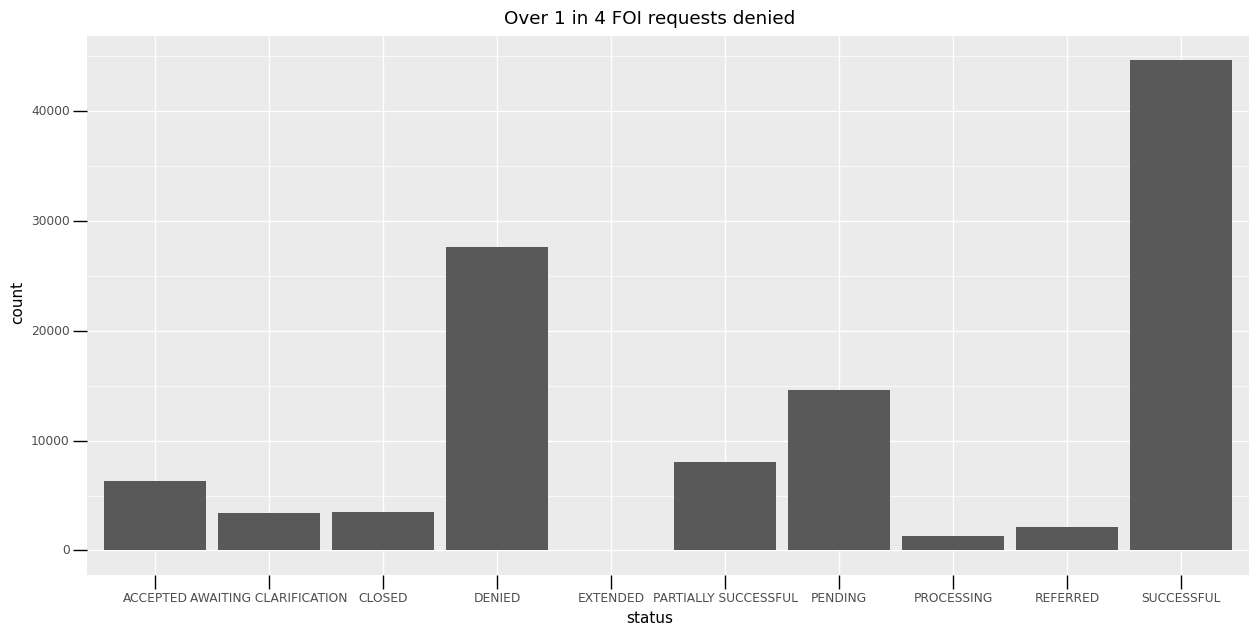

<ggplot: (298371961)>

In [11]:
(
    ggplot(df) + 
    geom_bar(aes(x="status")) + 
    theme(figure_size=(15,7), axis_ticks_length=10) + 
    labs(title="Over 1 in 4 FOI requests denied")
)

Note: We are still seeking clarification from PCOO on what **CLOSED** means. Meanwhile, over one in four FOI requests are denied by agencies. Over half are **successful** or **partially sucessful**. 

## Which agencies get the most FOI requests?

In [12]:
df.agency.value_counts().head(10)

DOH      9409
PSA      6414
DOLE     5559
BIR      4765
SSS      4636
DepEd    4421
OWWA     4113
DSWD     3881
NTC      3546
DPWH     2892
Name: agency, dtype: int64

The Department of Health, Philippine Statistics Authority and the labor department get the most requests.

## Which agencies deny the most requests?

The Bureau of Internal Revenue tops the list, although a deeper probe would show most of the denials were a result of requests for personal tax records, which are not for public consumption.

In [13]:
df[df.status=="DENIED"].agency.value_counts().head(10)

BIR     2841
DSWD    2393
DENR    1335
DOH     1097
DTI     1061
DOLE     834
DOTr     790
HDMF     704
DILG     590
NBI      517
Name: agency, dtype: int64

# Drilling down on specific agencies and requests

We select a few agencies and search in their request files some of the most common requests by **title** as well as some of the most denials. 

## DOH: Vaccination certificates

In [14]:
df[df.agency=="DOH"].title.value_counts().head(20)

Vaccination Certificate           279
Vaxcert                           139
VaxCert                            85
Vaccination certificate            78
Vaccine Certificate                69
Vaccination Card                   59
VAXCERT                            57
Lost Vaccination Card              55
Vax Cert                           47
VACCINATION CERTIFICATE            46
Vaccine certificate                41
Vax Certificate                    41
Lost Vaccine Card                  35
vaxcert                            33
VaxCertPH                          30
Vaxcertificate                     26
vaccination certificate            26
Swab test result                   22
Vaccination card                   21
Vaxcert; incorrect middle name     20
Name: title, dtype: int64

In [15]:
vax = ["Vaccination Certificate", "Vaxcert", "VaxCert", "Vaccination certificate", "Vax Cert", "VAXCERT", "VAX CERT", "Vax Certificate", "Vax certificate", "VACCINATION CERTIFICATE", "Vax cert", "VaxCertPH", "Vax Cert PH", "vax cert", "Vax cert request", "Vax Cert Request", "Vaccination Card", "Vax card", "vaccination card", "Vaccine certificate", "vaccine certificate"]
df_vax = df[df['title'].isin(vax)].reset_index(drop=True)
df_vax.count()

agency            1080
date              1080
title             1080
status            1080
purpose           1080
period_covered    1080
link               644
reason_denial      436
dtype: int64

Interpretation: Over one in 10 DOH requests from 2016 were to request for vaccination certificates.

## DSWD: Social amelioration program

This is the P275-billion pandemic relief program by the government in 2020 that gave dole outs to poor families. The program were given in two tranches and were marred by significant delays and other irregularities.

In [16]:
sap = ["SAP", "SAP 2nd tranche", "Sap 2nd tranche", "Social Amelioration Program", "Social amelioration program", "sap 2nd tranche", "SAP 2nd tranche", "2nd tranche", "DSWD SAP", "SAP 2ND TRANCHE", "Sap 2nd Tranche", "SAP 1st tranche", "SAP first tranche", "SAP 1ST TRANCHE", "Sap"]
df_sap = df[df['title'].isin(sap)].reset_index(drop=True)
df_sap[df_sap.status=="DENIED"].head(10)

,agency,date,title,status,purpose,period_covered,link,reason_denial
0,DSWD,2020-04-09,Social amelioration program,DENIED,Personal information only,04/09/2020 - 04/09/2020,NaN,—
1,DSWD,2020-04-21,Social Amelioration Program,DENIED,Transparency purposes to my kabarangay,04/01/2020 - 04/21/2020,NaN,—
2,DSWD,2020-04-21,Sap,DENIED,Solo parent,04/08/2020 - 04/21/2020,NaN,—
3,DSWD,2020-04-23,Social Amelioration Program,DENIED,Validation and Confirmation,04/23/2020 - 04/23/2020,NaN,—
4,DSWD,2020-04-25,Social Amelioration Program,DENIED,To known the list of beneficiaries of Social A...,03/01/2020 - 04/25/2020,NaN,—
5,DSWD,2020-04-27,Social Amelioration Program,DENIED,Transparency,04/19/2020 - 04/27/2020,NaN,—
6,DSWD,2020-04-27,DSWD SAP,DENIED,To know the status of DSWD SAP in our Barangay.,04/27/2020 - 04/27/2020,NaN,—
7,DSWD,2020-05-01,SAP,DENIED,SAP APPLICATION,05/01/2020 - 05/01/2020,NaN,—
8,DSWD,2020-05-01,Social Amelioration Program,DENIED,Social Amelioration Program,03/16/2020 - 04/30/2020,NaN,incomplete-request
9,DSWD,2020-05-03,Sap,DENIED,Applying for special amelioration program,03/21/2020 - 04/21/2020,NaN,—


Interpretation: Most requests for SAP were denied and were deemed an "invalid request."

In [17]:
df_sap.count()
#180 requests about SAP.

agency            177
date              177
title             177
status            177
purpose           177
period_covered    177
link                2
reason_denial     175
dtype: int64

## OVP: Any type of "assistance"

The office is known for its **Angat Buhay** program that helps the poor.

In [18]:
df[df.agency=="OVP"].title.str.contains("assistance", regex=False, case=False).value_counts()

False    502
True     341
Name: title, dtype: int64

Interpretation: 40% of OVP FOI requests mention some form of "assistance".

## BIR: Tax identification number or TIN

Tax matters are generally protected by privacy laws in the Philippines. But that did not stop some people to request for them through FOI.

In [19]:
#df_final[df_final.title=="Income Tax Return"]
tax = ['Income Tax Return', 'ITR','BIR 2316', 'TIN Verification', 'TIN VERIFICATION', 'BIR Form 2316', 'Income tax return', 'TIN', 'INCOME TAX RETURN', 'Form 2316', 'TIN NUMBER', 'tin number', 'TIN verification']
df_tax = df[df['title'].isin(tax)].reset_index(drop=True)
df_tax.head(7)

,agency,date,title,status,purpose,period_covered,link,reason_denial
0,BIR,2019-03-03,tin number,SUCCESSFUL,employment,03/03/2007 - 03/03/2010,NaN,—
1,BIR,2019-03-07,TIN,SUCCESSFUL,Lot sale,01/01/2005 - 03/07/2019,NaN,—
2,BIR,2019-06-12,TIN,SUCCESSFUL,Opening of Bank account,06/12/2019 - 06/12/2019,NaN,—
3,BIR,2019-09-26,TIN,SUCCESSFUL,For issuance of tin ID,03/29/2019 - 06/22/2019,NaN,—
4,BIR,2019-10-11,tin number,DENIED,employment,09/05/2019 - 10/10/2019,NaN,incomplete-request
5,BIR,2019-11-29,BIR 2316,PARTIALLY SUCCESSFUL,BANK LOAN,01/01/2018 - 12/31/2018,NaN,—
6,BIR,2019-12-26,TIN,DENIED,For verification,07/26/2019 - 12/26/2019,NaN,—


In [20]:
df_tax.status.value_counts(normalize=True) *100

DENIED                    51.012146
AWAITING CLARIFICATION    34.898785
SUCCESSFUL                 4.696356
PENDING                    4.534413
ACCEPTED                   2.186235
PARTIALLY SUCCESSFUL       1.295547
CLOSED                     0.647773
REFERRED                   0.485830
PROCESSING                 0.242915
Name: status, dtype: float64

# Know each agencies' performance 

Just changed the name of the agency in brackets.

In [21]:
df[df.agency=="OP"]
#There were some requests for SALN.

,agency,date,title,status,purpose,period_covered,link,reason_denial
2567,OP,2017-12-01,Total cost/expenses for the foreign trips of P...,PENDING,For research purposes for my year-end report f...,01/01/2017 - 12/01/2017,NaN,—
2588,OP,2017-12-04,Cost of President Duterte's foreign trips in h...,PENDING,News research,07/01/2016 - 07/01/2017,NaN,—
2612,OP,2017-12-05,Updates on the appeals of suspended and closed...,PENDING,Research,02/02/2017 - 12/05/2017,NaN,—
2703,OP,2017-12-24,2018 General Appropriations Act,PENDING,Factual basis in research and review of certai...,12/24/2017 - 12/24/2017,NaN,—
2721,OP,2017-12-30,Executive Order 126 dated 1959,PENDING,HISTORY,12/30/2017 - 12/30/2017,NaN,—
3033,OP,2018-01-31,NSC Group Photos with Living Former Presidents,PENDING,Research and Archive purposes.,07/27/2016 - 07/27/2016,NaN,—
3165,OP,2018-02-11,What is the counterpart of the CIA in the Phil...,PENDING,Research,02/11/2018 - 02/11/2018,NaN,—
3169,OP,2018-02-11,Breakdown of War Materiel used by the AFP in t...,PENDING,Research for Graduate School class.,05/23/2017 - 11/23/2017,NaN,—
3183,OP,2018-02-11,Documentary proof or evidence of President Dut...,PENDING,Research for Graduate School class.,03/28/1945 - 02/11/2018,NaN,—
3212,OP,2018-02-13,Actual Expenses of ASEAN 2017 budget,PENDING,Research purposes,01/01/2017 - 01/01/2018,NaN,—


## Top reasons for denial

Applicable only to data as of December 2021.

In [22]:
df.reason_denial.value_counts(dropna=False)
#"-" means it's not applicable since the request was not denied.

—                               77314
NaN                             20770
wrong-agency                     6980
incomplete-request               2764
invalid-request                  2084
information-available-online     1620
exceptions                          2
privacy                             1
Name: reason_denial, dtype: int64

# SALN requests, anyone?

Stands for "Statements of Assets, Liabilities and Net Worth" filed by public officials every year.

In [23]:
df.title.str.contains("SALN", regex=False, case=False).value_counts()

False    111283
True        250
Name: title, dtype: int64

Over 200 requests using the exact words "SALN" on the FOI portal. Below, we use a regex pattern to screen this more.

In [24]:
df.title.str.extractall(r'(.*\SALN.+)', re.IGNORECASE).count()
#260 requests mentioning SALN.

0    251
dtype: int64

In [25]:
df[df.agency=="OVP"].title.str.extractall(r'(.*\SALN.+)', re.IGNORECASE).value_counts().sum()
#66 requests for the SALN of the Vice President.

63

## Track request numbers through time

### By month

In [26]:
month_query = df.resample('M', on='date').title.count().to_frame().reset_index()
month_query.tail()

,date,title
61,2021-12-31,4004
62,2022-01-31,4514
63,2022-02-28,6218
64,2022-03-31,8353
65,2022-04-30,1685


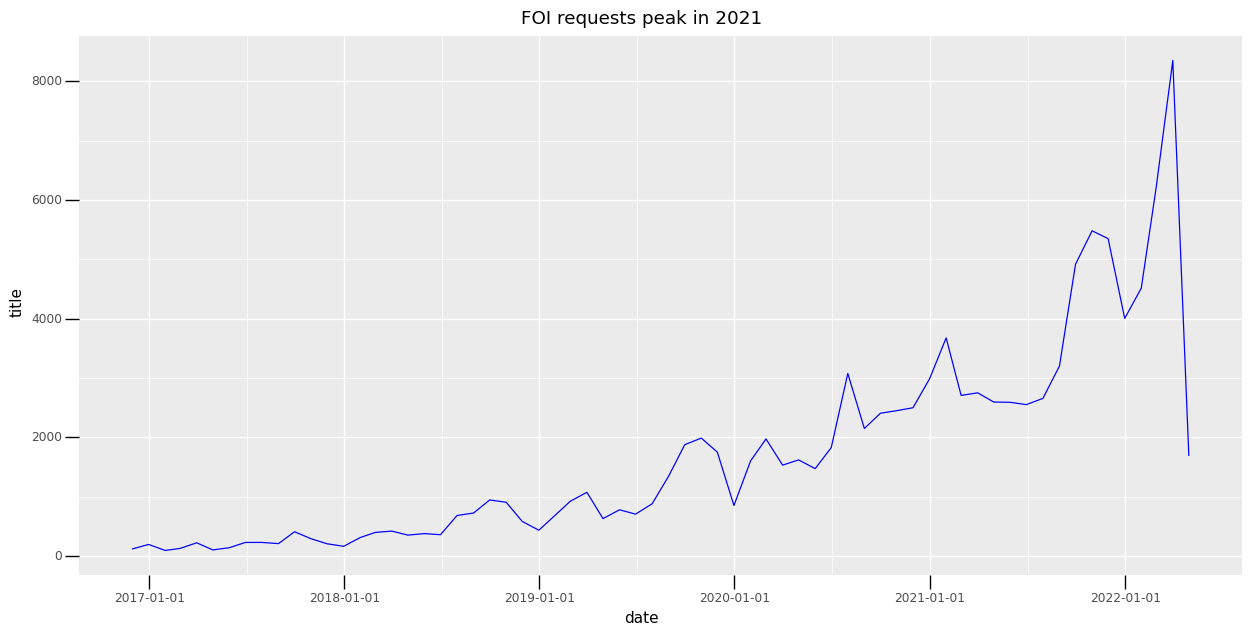

<ggplot: (298420276)>

In [27]:
(
    ggplot(month_query, aes(x="date", y="title")) + 
    geom_line(color="blue", stat="identity") + 
    theme(figure_size=(15,7), axis_ticks_length=10) + 
    labs(title="FOI requests peak in 2021")
)

In [28]:
df.resample('M', on='date').title.count().sort_values(ascending=False).head(10)
#Largest number of FOI requests recorded in February 2022.

date
2022-03-31    8353
2022-02-28    6218
2021-10-31    5481
2021-11-30    5349
2021-09-30    4917
2022-01-31    4514
2021-12-31    4004
2021-01-31    3676
2021-08-31    3202
2020-07-31    3076
Name: title, dtype: int64

### By year

In [29]:
year_query = df.resample('A', on='date').title.count().to_frame().reset_index()
year_query

,date,title
0,2016-12-31,311
1,2017-12-31,2413
2,2018-12-31,6484
3,2019-12-31,13489
4,2020-12-31,25588
5,2021-12-31,42478
6,2022-12-31,20770


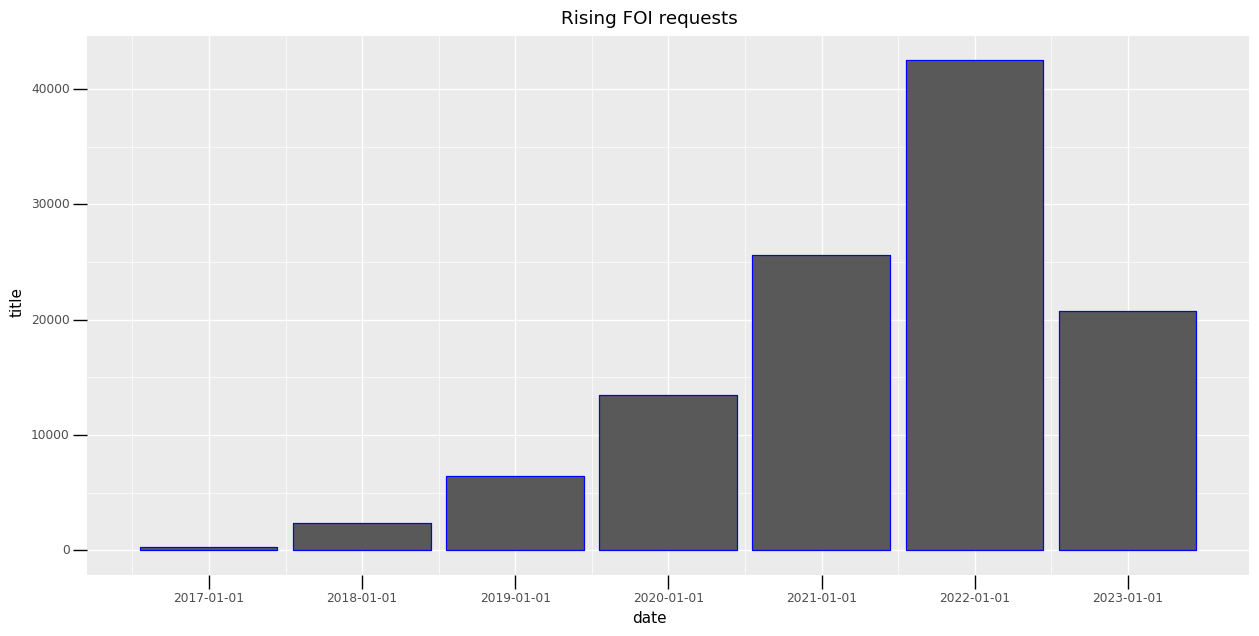

<ggplot: (298442933)>

In [30]:
(
    ggplot(year_query, aes(x="date", y="title")) + 
    geom_col(color="blue") + 
    theme(figure_size=(15,7), axis_ticks_length=10) + 
    labs(title="Rising FOI requests")
)

## Year-on-year change shows slowing down increase in FOI requests

In [31]:
df.resample('A', on='date').title.count().pct_change() * 100
#2016 started in September. 2022 as of few weeks of January.

date
2016-12-31           NaN
2017-12-31    675.884244
2018-12-31    168.711148
2019-12-31    108.035163
2020-12-31     89.695307
2021-12-31     66.007504
2022-12-31    -51.104101
Freq: A-DEC, Name: title, dtype: float64

# End.